# This code can replot the apStar/apVisit files for RV Shift Comparsion between visits of APOGEE DR17

In [1]:
##Import the apStar File

import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

classify = (input("LCO or APO: "))
fitsfile = (input("The 2MASS ID: "))
field = (input("What is the Field (be careful with capitalization): "))

if (classify == "APO"):
#APO Stars
    linkapo = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/" + field + "/apStar-dr17-" + fitsfile + ".fits"
    apofit = astropy.utils.data.download_file(linkapo)
    hdulist = fits.open(apofit)
else:
#LCO Stars
    linklco = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/lco25m/" + field + "/asStar-dr17-" + fitsfile + ".fits"
    lcofit = astropy.utils.data.download_file(linklco)
    hdulist = fits.open(lcofit)
    
spectra_hdu = hdulist[1]

spectra_data = spectra_hdu.data
spectra_data.shape
b=c=d=e=0


#Assign the data

len(spectra_data)
if len(spectra_data) < 4:
    print("4 too few visits")
    b = 1
if len(spectra_data) < 5:
    print("3 too few visits")
    c = 1
if len(spectra_data) < 6:
    print("2 too few visits")
    d=1
if len(spectra_data) < 7:
    print("1 too few visit")
    e=1


LCO or APO:  APO
The 2MASS ID:  2M05215658+4359220
What is the Field (be careful with capitalization):  165+04


2 too few visits
1 too few visit


In [2]:
#Get all the apStar info to graph it later

crval = spectra_hdu.header['CRVAL1']
cdelt = spectra_hdu.header['CDELT1']
startwave = 10**crval
space = 10**cdelt
nwave = np.arange(8575)

def waves():
    nwave2 = startwave*(space**nwave)
    return nwave2

apstarwv = waves()

visit_one_data = spectra_data[2,:]
dfa1 = pd.DataFrame({'flux': visit_one_data})
if b==0:
    visit_two_data = spectra_data[3,:]
    dfa2 = pd.DataFrame({'flux': visit_two_data})
if c==0:
    visit_three_data = spectra_data[4,:]
    dfa3 = pd.DataFrame({'flux': visit_three_data})
if d==0:
    visit_four_data = spectra_data[5,:]
    dfa4 = pd.DataFrame({'flux': visit_four_data})
if e==0:
    visit_five_data = spectra_data[6,:]
    dfa5 = pd.DataFrame({'flux': visit_five_data})

In [3]:
#Get the apVisit file info from the apStar files, and split (also redo this after you check the RV values
#at the bottom to ensure you get the biggest shifted visits)

master = hdulist[0]
apvisit_1a = master.header['SFILE1']
apvisit_1 = apvisit_1a.split('-')
if b==0:
    apvisit_2a = master.header['SFILE2']
    apvisit_2 = apvisit_2a.split('-')
if c==0:
    apvisit_3a = master.header['SFILE3']
    apvisit_3 = apvisit_3a.split('-')
if d==0:
    apvisit_4a = master.header['SFILE4']
    apvisit_4 = apvisit_4a.split('-')
if e==0:
    apvisit_5a = master.header['SFILE5']
    apvisit_5 = apvisit_5a.split('-')

In [4]:
#Get the S/N from the files for the graph legend 

snr_1 = master.header['SNRVIS1']
if b==0:
    snr_2 = master.header['SNRVIS2']
if c==0:
    snr_3 = master.header['SNRVIS3']
if d==0:
    snr_4 = master.header['SNRVIS4']
if e==0:
    snr_5 = master.header['SNRVIS5']

In [5]:
#Download the apvisit files

if (classify == "APO"):
    link1 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_1[2] + "/" + apvisit_1[3] + "/" + apvisit_1a
    apvisit1 = astropy.utils.data.download_file(link1)
else:
    link1 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_1[2] + "/" + apvisit_1[3] + "/" + apvisit_1a
    apvisit1 = astropy.utils.data.download_file(link1)
    
if b==0:
    if (classify == "APO"):
        link2 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_2[2] + "/" + apvisit_2[3] + "/" + apvisit_2a
        apvisit2 = astropy.utils.data.download_file(link2)
    else:
        link2 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_2[2] + "/" + apvisit_2[3] + "/" + apvisit_2a
        apvisit2 = astropy.utils.data.download_file(link2)
if c==0:
    if (classify == "APO"):
        link3 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_3[2] + "/" + apvisit_3[3] + "/" + apvisit_3a
        apvisit3 = astropy.utils.data.download_file(link3)
    else:
        link3 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_3[2] + "/" + apvisit_3[3] + "/" + apvisit_3a
        apvisit3 = astropy.utils.data.download_file(link3)
        
if d==0:
    if (classify == "APO"):
        link4 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_4[2] + "/" + apvisit_4[3] + "/" + apvisit_4a
        apvisit4 = astropy.utils.data.download_file(link4)
    else:
        link4 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_4[2] + "/" + apvisit_4[3] + "/" + apvisit_4a
        apvisit4 = astropy.utils.data.download_file(link4)
if e==0:
    if (classify == "APO"):
        link5 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_5[2] + "/" + apvisit_5[3] + "/" + apvisit_5a
        apvisit5 = astropy.utils.data.download_file(link5)
    else:
        link5 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_5[2] + "/" + apvisit_5[3] + "/" + apvisit_5a
        apvisit5 = astropy.utils.data.download_file(link5)

In [6]:
#Extract Spectra Data into data python files
apvisit_1_hdulist = fits.open(apvisit1)
apvis1_spectra = apvisit_1_hdulist[1]
if b==0:
    apvisit_2_hdulist = fits.open(apvisit2)
    apvis2_spectra = apvisit_2_hdulist[1]
if c==0:
    apvisit_3_hdulist = fits.open(apvisit3)
    apvis3_spectra = apvisit_3_hdulist[1]
if d==0:
    apvisit_4_hdulist = fits.open(apvisit4)
    apvis4_spectra = apvisit_4_hdulist[1]
if e==0:
    apvisit_5_hdulist = fits.open(apvisit5)
    apvis5_spectra = apvisit_5_hdulist[1]

In [7]:
#Get the relevant fluxes and reshape the data into 1 long list
flux1 = []
for i in range(3):
    for j in range(4095):
        flux1.append(apvis1_spectra.data[i, j])
if b==0:
    flux2=[]
    for k in range(3):
        for q in range(4095):
            flux2.append(apvis2_spectra.data[k, q])
if c==0:
    flux3=[]
    for r in range(3):
        for t in range(4095):
            flux3.append(apvis3_spectra.data[r, t])
if d==0:
    flux4=[]
    for m in range(3):
        for v in range(4095):
            flux4.append(apvis4_spectra.data[m, v])
if e==0:
    flux5=[]
    for w in range(3):
        for u in range(4095):
            flux5.append(apvis5_spectra.data[w, u])
i = j = k = q = r = t = m = v = w = u = 0

In [8]:
#Get the wavelength files and spit them into python data files

apvisit_1_hdulist = fits.open(apvisit1)
apvis1_wv = apvisit_1_hdulist[4]
if b==0:
    apvisit_2_hdulist = fits.open(apvisit2)
    apvis2_wv = apvisit_2_hdulist[4]
if c==0:
    apvisit_3_hdulist = fits.open(apvisit3)
    apvis3_wv = apvisit_3_hdulist[4]
if d==0:
    apvisit_4_hdulist = fits.open(apvisit4)
    apvis4_wv = apvisit_4_hdulist[4]
if e==0:
    apvisit_5_hdulist = fits.open(apvisit5)
    apvis5_wv = apvisit_5_hdulist[4]

In [9]:
#Get the relevant wavelengths and reshape the data into 1 long list

wv1 = []
for i in range(3):
    for j in range(4095):
        wv1.append(apvis1_wv.data[i, j])

df1 = pd.DataFrame({"flux": flux1, "wv": wv1})
if b==0:
    wv2=[]
    for k in range(3):
        for q in range(4095):
            wv2.append(apvis2_wv.data[k, q])
    df2 = pd.DataFrame({"flux": flux2, "wv": wv2})
if c==0:
    wv3=[]
    for r in range(3):
        for t in range(4095):
            wv3.append(apvis3_wv.data[r, t])
    df3 = pd.DataFrame({"flux": flux3, "wv": wv3})
if d==0:
    wv4=[]
    for m in range(3):
        for v in range(4095):
            wv4.append(apvis4_wv.data[m, v])
    df4 = pd.DataFrame({"flux": flux4, "wv": wv4})
if e==0:
    wv5=[]
    for w in range(3):
        for u in range(4095):
            wv5.append(apvis5_wv.data[w, u])
    df5 = pd.DataFrame({"flux": flux5, "wv": wv5})

In [10]:
#Setting Maximum/Minimum on Graph limits

max_val1 = 0
max_val2 = 0
max_val3 = 0
max_val4 = 0
max_val5 = 0
max_val_final = 0
counter = 0

min_val1 = 0
min_val2 = 0
min_val3 = 0
min_val4 = 0
min_val5 = 0
min_val_final = 0
mincounter = 0

In [11]:
#Get 90th to 10th Percentile Values of Max/Min flux

visit_1_per = np.percentile(dfa1.flux,[90, 10])
if b==0:
    visit_2_per = np.percentile(dfa2.flux,[90, 10])
if c==0:
    visit_3_per = np.percentile(dfa3.flux,[90, 10])
if d==0:
    visit_4_per = np.percentile(dfa4.flux,[90, 10])
if e==0:
    visit_5_per = np.percentile(dfa5.flux,[90, 10])

In [12]:
#Avg Maximum (90th < x < 10th percentile) Flux

for i in range (1):
    max_val1 = visit_1_per[0]
    counter += 1
    if b==0:
        max_val2 = visit_2_per[0]
        counter += 1
    if c==0:
        max_val3 = visit_3_per[0]
        counter += 1
    if d==0:
        max_val4 = visit_4_per[0]
        counter += 1
    if e==0:
        max_val5 = visit_5_per[0]
        counter += 1 
    max_val_final = ((max_val1 + max_val2 + max_val3 + max_val4 + max_val5)/counter) + 150       

In [13]:
#Avg Minimum (90th < x < 10th percentile) Flux

for i in range (1):
    min_val1 = visit_1_per[1]
    mincounter += 1
    if b==0:
        min_val2 = visit_2_per[1]
        mincounter += 1
    if c==0:
        min_val3 = visit_3_per[1]
        mincounter += 1
    if d==0:
        min_val4 = visit_4_per[1]
        mincounter += 1
    if e==0:
        min_val5 = visit_5_per[1]
        mincounter += 1   
    min_val_final = ((min_val1 + min_val2 + min_val3 + min_val4 + min_val5)/mincounter) - 150

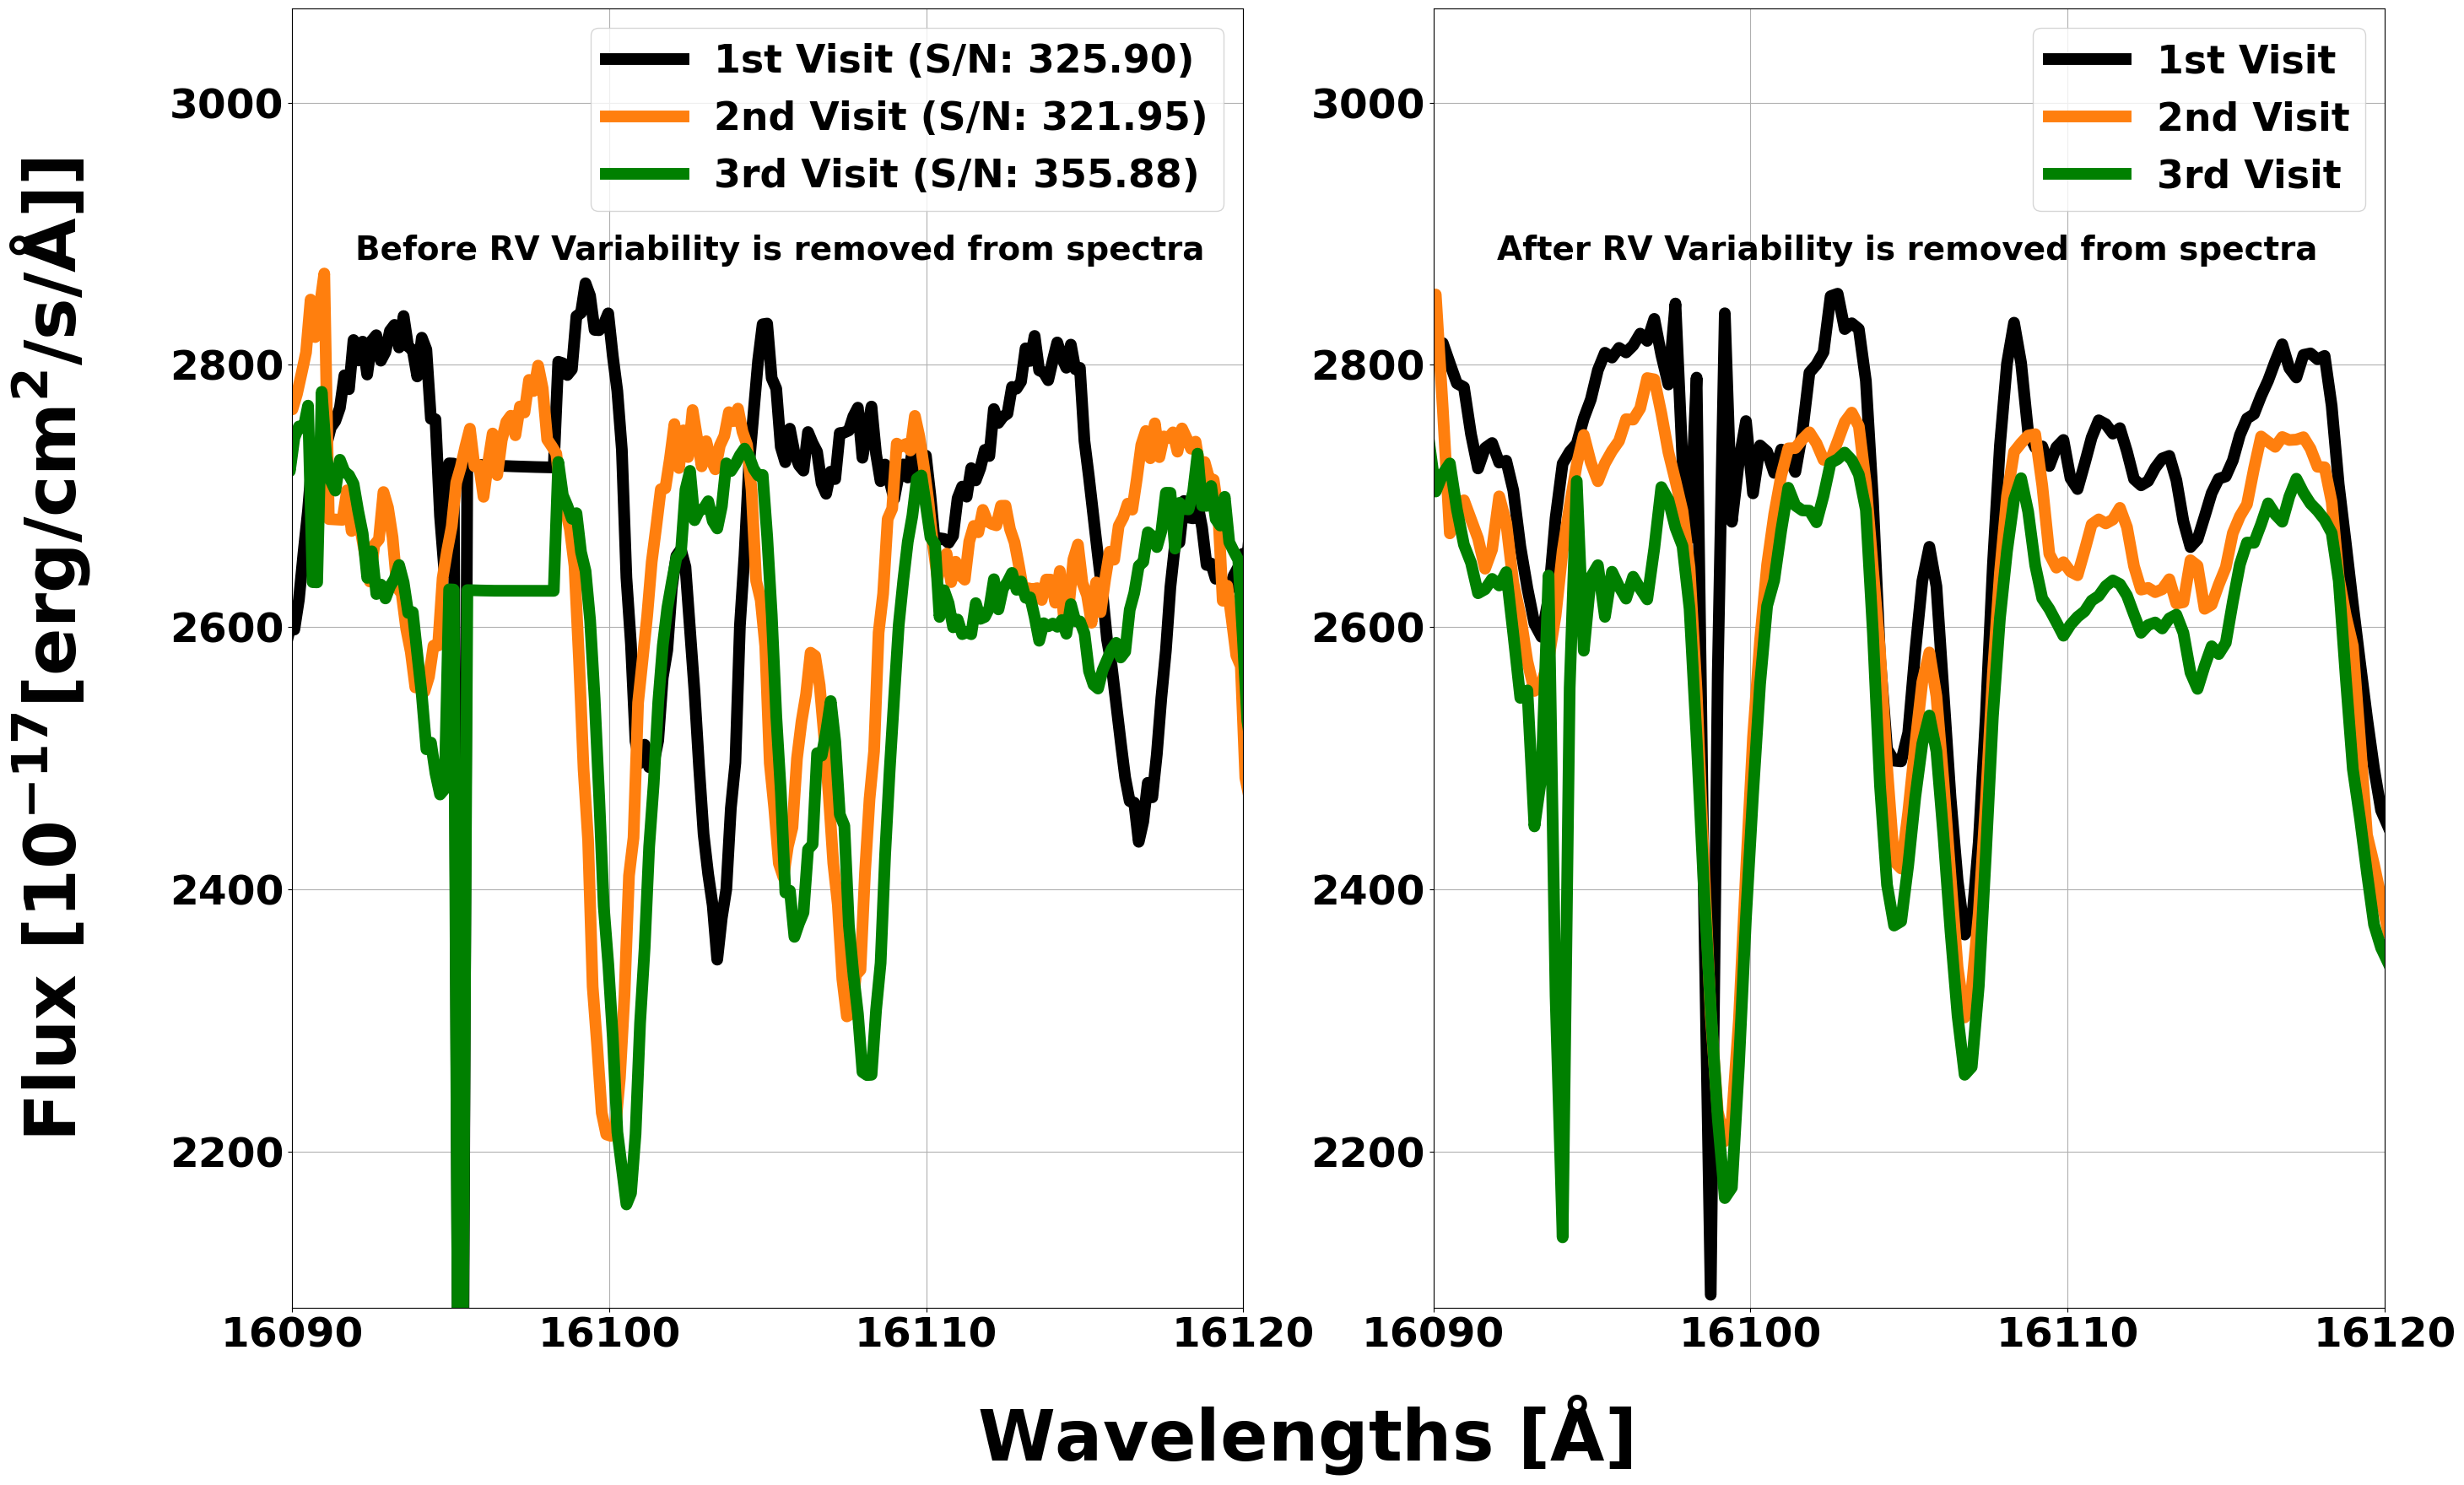

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35
plt.rcParams['font.weight'] = 'bold'

#Saving the plot, larger

fig2, axe = plt.subplots(nrows=1, ncols=2, figsize=(32, 20))

axe[0].plot(df1.wv, df1.flux+100, label = "1st Visit (S/N: " + str("{:.2f}".format(snr_1)) +")", linewidth = 10,c ='k')
if b==0:
    axe[0].plot(df2.wv, df2.flux+50, label = "2nd Visit (S/N: " + str("{:.2f}".format(snr_2)) +")",  linewidth = 10, c='tab:orange')
if c==0:
    axe[0].plot(df3.wv, df3.flux, label = "3rd Visit (S/N: " + str("{:.2f}".format(snr_3)) +")", linewidth = 10, c='g')
if d==0:
    axe[0].plot(df4.wv, df4.flux-50, label = "4th Visit (S/N: " + str("{:.2f}".format(snr_4)) +")", linewidth = 10, c='b')
if e==0:
    axe[0].plot(df5.wv, df5.flux-100, label = "5th Visit(S/N: " + str("{:.2f}".format(snr_5)) +")", linewidth = 10, c='y')
    
axe[1].plot(apstarwv, dfa1.flux+100, label='1st Visit',  linewidth = 10, c='k')
if b==0:
    axe[1].plot(apstarwv, dfa2.flux+50, label='2nd Visit',  linewidth = 10, c='tab:orange')
if c==0:
    axe[1].plot(apstarwv, dfa3.flux, label='3rd Visit', linewidth = 10, c='g')
if d==0:
    axe[1].plot(apstarwv, dfa4.flux-50, label='4th Visit', linewidth = 10, c='b')
if e==0:
    axe[1].plot(apstarwv, dfa5.flux-100, label='5th Visit', linewidth = 10, c='y')

axe[0].set_xlim([16090, 16120])
axe[1].set_xlim([16090, 16120])
#axe[0].set_ylim([525, 950])
#axe[1].set_ylim([525, 950])
axe[0].set_ylim(min_val_final+70, max_val_final+70)
axe[1].set_ylim(min_val_final+70, max_val_final+70)

star_avg_snr = hdulist[0].header['SNR']
abvr = fitsfile[2:]
fig2.supxlabel('Wavelengths [$\mathbf{\mathrm{\AA}}$]', fontsize=60, weight="bold")
fig2.supylabel('Flux [$\mathbf{10^{-17}[erg/cm^{2}/s/\mathrm{\AA}]}$]', fontsize = 60, weight="bold")

axe[0].legend(loc = "best", fontsize = 33)
axe[1].legend(loc = "best", fontsize = 33)
axe[0].set_xticks(axe[0].get_xticks()[::2])
axe[1].set_xticks(axe[1].get_xticks()[::2])
axe[0].grid()
axe[1].grid()
axe[0].text(16092, 2880, "Before RV Variability is removed from spectra", fontsize = 28)
axe[1].text(16092, 2880, "After RV Variability is removed from spectra", fontsize = 28)
plt.savefig("Object " +fitsfile + ".png", dpi=300)


In [15]:
#Radial Velocity values from the object, so that different visits may be chosen to replot to best see the RV variability

rvbin = hdulist[9]
rvbin.header

RV = rvbin.header['TTYPE5']
RVdata = rvbin.data[RV]

print(RVdata)

[-63.27255704  15.09167332  24.18066845]
